In [1]:
pip install pandas scikit-learn openpyxl matplotlib seaborn numpy==1.26.0 catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import catboost as cb
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel("train.xlsx")  # Укажи правильный путь к файлу
df.head()


,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300


In [22]:
df

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


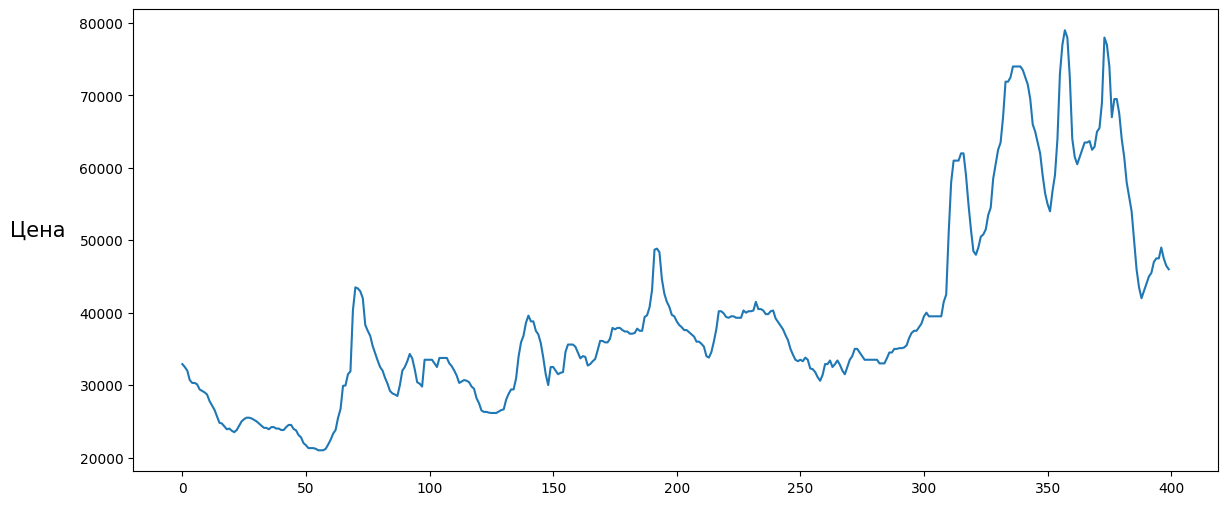

In [15]:
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
# plt.title('Time series example')
# plt.xlabel('Date', fontsize=15)
plt.ylabel('Цена', rotation=0, labelpad=30, fontsize=15)
df['Цена на арматуру'].plot();

In [6]:
X = df.drop(columns=["Цена на арматуру"])  # Замените "target" на название вашей целевой переменной
y = df["Цена на арматуру"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


0:	learn: 13231.8412415	total: 1.11ms	remaining: 1.11s
100:	learn: 3166.7054277	total: 89.8ms	remaining: 800ms
200:	learn: 1952.9814063	total: 177ms	remaining: 704ms
300:	learn: 1395.9183393	total: 266ms	remaining: 617ms
400:	learn: 1072.2628736	total: 356ms	remaining: 532ms
500:	learn: 882.9212324	total: 445ms	remaining: 443ms
600:	learn: 757.9284708	total: 543ms	remaining: 360ms
700:	learn: 653.4000992	total: 641ms	remaining: 274ms
800:	learn: 584.4791008	total: 740ms	remaining: 184ms
900:	learn: 522.3462432	total: 831ms	remaining: 91.3ms
999:	learn: 472.5102103	total: 925ms	remaining: 0us
0:	learn: 12653.1850791	total: 1.09ms	remaining: 1.09s
100:	learn: 3057.4997483	total: 88.4ms	remaining: 787ms
200:	learn: 1936.4928037	total: 177ms	remaining: 705ms
300:	learn: 1378.0132423	total: 267ms	remaining: 620ms
400:	learn: 1070.5733042	total: 358ms	remaining: 535ms
500:	learn: 856.0453623	total: 448ms	remaining: 446ms
600:	learn: 718.1802996	total: 543ms	remaining: 360ms
700:	learn: 618.5

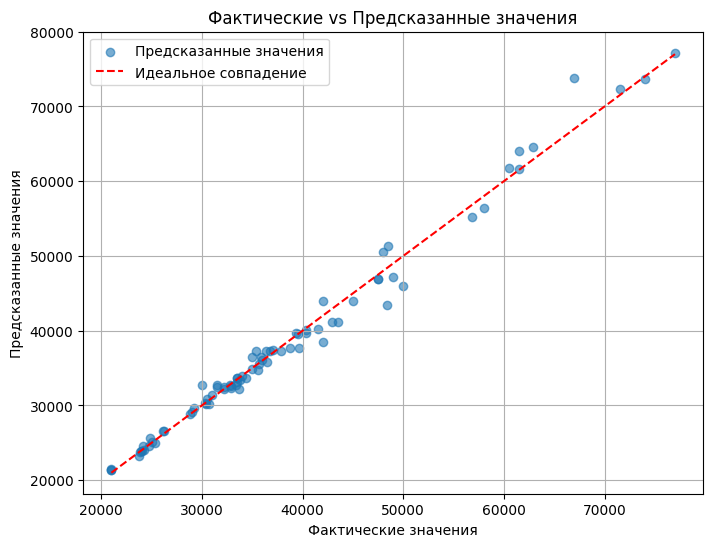

In [21]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Инициализация модели
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, verbose=100)

# Кросс-валидация
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print(f"Средний MAE по кросс-валидации: {-np.mean(cv_scores):.2f}")

# Обучение модели
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE на тесте: {mae:.2f}")

# Визуализация предсказаний
# Фактические и предсказанные значения (замени своими)
y_true = np.array(y_test)  # Фактические значения
y_pred = np.array(y_pred)  # Предсказанные значения
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, label="Предсказанные значения")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label="Идеальное совпадение")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.legend()
plt.grid(True)
plt.show()